## 总结动态规划

## 解决具备一定的限制条件的最优问题

### 1. 这个问题可以被分割成若干子问题
### 2. 子问题之间存在overlapping重合
### 3. 对重合的子问题进行cache（缓存）
### 4. 依据cache数据加速解决问题
### 5. 还要构建parse solution函数解析最终的结果

1. Edit Distance 编辑距离
2. 基因测序里边的相似基因判断
3. 图形学里边的覆盖问题
4. 路径规划问题

## 梯度下降

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
def func(x):
    return 10 * x** 2 + 37*x + 9

###  对 func(x) 求导得梯度函数 gradient(x)

In [18]:
def gradient(x):    
    return 20 * x + 37

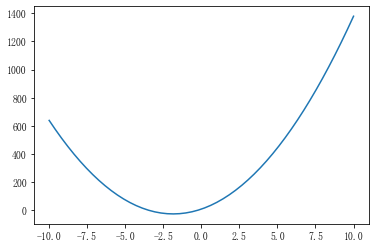

In [19]:
x = np.linspace(-10, 10)    # numpy.linspace(start, stop, num=50）创建等差数列 num默认为个数  返回的是 [start, stop]之间的均匀分布
plt.plot(x, func(x))

### 随机初始 x 值

In [20]:
x_optimal = random.choice(x)
x_optimal

-4.285714285714286

### 更新 x 值

梯度是函数增长方向，为了求函数低谷，梯度 × (-1)

$$ x = x + (-1) * \frac{\partial{y}}{\partial{x}} \alpha $$

In [21]:
alpha = 1e-4   # 梯度更新系数，每次往梯度方向走一点点
steps = []

for i in range(200):  #  迭代200次更新 x 
    x_optimal = x_optimal + (-1) * gradient(x_optimal) * alpha
    steps.append(x_optimal)

In [22]:
for s in steps:
    print(s, func(s))

-4.280842857142857 33.86496996122446
-4.275981171428572 33.62884644125944
-4.271129209085714 33.39366647088016
-4.266286950667543 33.15942627966254
-4.261454376766208 32.926122112249004
-4.256631468012675 32.69375022828845
-4.25181820507665 32.46230690237621
-4.247014568666497 32.23178842399432
-4.242220539529164 32.00219109745203
-4.237436098450106 31.77351124182664
-4.232661226253206 31.545745190904285
-4.227895903800699 31.318889293121458
-4.223140111993098 31.092939911506136
-4.218393831769112 30.86789342361979
-4.213657044105574 30.643746221498986
-4.2089297300173625 30.42049471159791
-4.2042118705573275 30.198135314730337
-4.1995034468162125 29.976664466012608
-4.19480443992258 29.756078614806427
-4.1901148310427345 29.536374224661643
-4.185434601380649 29.317547773259918
-4.180763732177888 29.09959575235797
-4.176102204713532 28.882514667731527
-4.171450000304104 28.666301039119247
-4.1668071003034965 28.450951400166957
-4.16217348610289 28.23646229837192
-4.157549139130684 28.0

## 给省会设置5个核心能源点

In [23]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### 特征提取

### 正则表达式

import re

从文本中提取关键词，特征向量化，特征提取

python 中查询包的用法：  ??re

In [24]:
import re

In [25]:
test_string = "name:'南宁', geoCoord:[108.33, 22.84]},"

In [26]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]") #  re.compile 返回所取出的关键词的正则表达式 pattern

In [27]:
pattern.findall(test_string)  # 从 test_string 中找出 pattern

[('南宁', '108.33', '22.84')]

In [28]:
city_location = {}   # 字典{ 索引：值}： { '地名'：[经/纬度] }

for line in coordination_source.split('\n'):
    
    city_info = pattern.findall(line)
    
    if not city_info: continue  # 结束此次for循环，进入下次for循环
        
    city_name, long, lat = city_info[0]    #  从 ('南宁', '108.33', '22.84') 中匹配 city_name = 南宁, long = 108.33, lat = 22.84
    
    # print(city_info[0])
    # print(long,lat)
    
    long, lat = float(long), float(lat)
    
    city_location[city_name] = [long, lat]  # 将取出的关键词重新组合为字典{} ：'南宁': [108.33, 22.84]

In [29]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

## 考虑城市的距离，建造能源中心

### 距离

1. 球面地理距离：GeoDistant
2. 余弦距离：Cosine Distance 
3. 欧几里得距离：Euclidean Distance
4. 曼哈顿距离：Manhattan distance 

### 计算球面距离

In [30]:
import math
from pylab import mpl   # pylab包括了许多NumPy和pyplot模块中常用的函数。
import networkx as nx   # networkx 画网格图

In [31]:
def geo_distance(origin, destination):  # 输入起始点，目的地
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # 地球半径 6371km

    dlat = math.radians(lat2 - lat1)  #  radians() 方法将角度转换为弧度
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [32]:
geo_distance(city_location['上海'], city_location['南宁'])

1599.3205255274631

In [33]:
mpl.rcParams['font.sans-serif'] = 'FangSong'  # pylot使用rc配置文件来自定义图形的各种默认属性
mpl.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

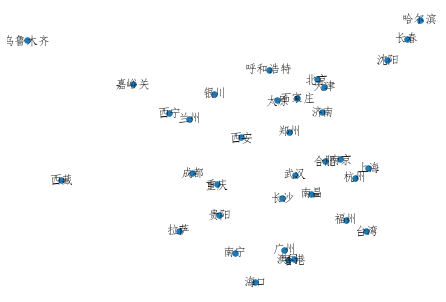

In [34]:
city_graph = nx.Graph()  # 创建空图
city_graph.add_nodes_from(city_location.keys())  # 增加节点
nx.draw(city_graph, city_location, with_labels=True, node_size=30)  # 第二个参数传入的是字典{} city_location ，

In [35]:
Xs = np.array(list(city_location.values()))   # 转成 list 后 每行存一个 [103.73,  36.03]经纬度，不转的话就每行写好多个，写满再转行
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

## 找到合理的能源中心

In [93]:
# 字典时，用法一般是dict={},添加元素的只需要dict[element] =value即，调用的时候也是如此，dict[element] = xxx,
# 但前提是element字典里，如果不在字典里就会报错

from collections import defaultdict  # defaultdict的作用是在于，当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值

def get_random_ceneter(all_x, all_y):
    return random.uniform(min(all_x), max(all_x)), random.uniform(min(all_y), max(all_y))

all_x = Xs[:, 0]
all_y = Xs[:, 1]

K = 5
threshold = 3  # k-means 平均值阈值

centers = {'{}'.format(i+1): get_random_ceneter(all_x, all_y) for i in range(K)}

the_first_center = {k: v for k, v in centers.items()}  # 记录初始点

changed = True

while changed:
    
    closet_points = defaultdict(list)

    for x, y in zip(all_x, all_y):
        
        closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t:t[1])
        # print('for{},{}the closet center is{}'.format(x,y,closet_c))
        closet_points[closet_c].append([x, y])  # 把离节点最近的点加入该节点
    
    changed = False
    for c in closet_points:
        
        former_center = centers[c]   # 之前的中心点
        
        neigbors_belong_to_c = closet_points[c]
        
        neighbors_center = np.mean(neigbors_belong_to_c,axis=0)  # 这一次的中心点
        
        if geo_distance(neighbors_center,former_center) > threshold:  # 查看原来的中心点和现在的中心点之间的球面距离
            print('Update:{}center'.format(c))
            centers[c] = neighbors_center  # 赋值新的中心点
            changed = True

Update:1center
Update:5center
Update:3center
Update:2center
Update:1center
Update:4center
Update:3center
Update:4center
Update:5center
Update:3center
Update:1center
Update:4center
Update:5center
Update:3center
Update:1center
Update:5center
Update:1center
Update:5center
Update:1center


In [94]:
centers

{'1': array([116.37      ,  27.04230769]),
 '2': array([87.68, 43.77]),
 '3': array([117.833,  39.861]),
 '4': array([103.772,  36.96 ]),
 '5': array([103.24666667,  27.44666667])}

In [95]:
for x,y in centers.values():
    print(x,y)

116.36999999999999 27.042307692307695
87.68 43.77
117.83300000000001 39.861000000000004
103.772 36.96
103.24666666666667 27.44666666666667


In [96]:
for e in zip([1,2],[-1,-2]):  #  分别组合每个列表中的x y  ,分别即打印出列表的x ,y
    print(e)

(1, -1)
(2, -2)


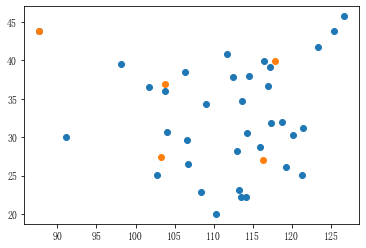

In [97]:
# plt.scatter(all_x,all_y)   # 打印所有城市的点
# plt.scatter([x for x,y in centers.values()], [y for x,y in centers.values()])  # 打印中心点

# 简单写法 zip
plt.scatter(*[all_x,all_y])   # 打印所有城市的点
plt.scatter(*zip(*centers.values()))   # 打印中心点

In [98]:
#  生成能源站名字
#  生成字典
city_location_with_station = {'能源站{}'.format(int(i)+1):position for i,position  in centers.items() }

In [99]:
city_location_with_station

{'能源站2': array([116.37      ,  27.04230769]),
 '能源站3': array([87.68, 43.77]),
 '能源站4': array([117.833,  39.861]),
 '能源站5': array([103.772,  36.96 ]),
 '能源站6': array([103.24666667,  27.44666667])}

### 画出能源站

In [100]:
def draw_cities(cities,color = None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph,cities,node_color=color, with_labels=True, node_size=50)

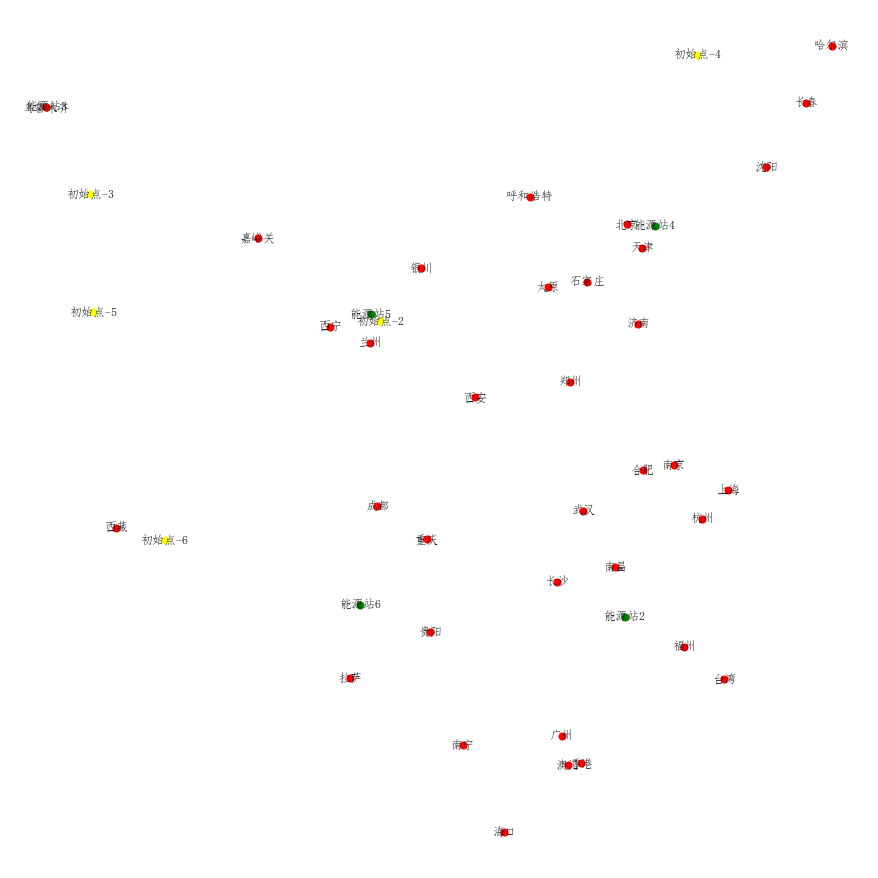

In [103]:
plt.figure(i,figsize= (12,12))
draw_cities({'初始点-{}'.format(int(i)+1):p for i, p in the_first_center.items()},color = 'yellow')
draw_cities(city_location_with_station,color = 'green')  # 画出能源站
draw_cities(city_location,color = 'red')   # 画出所有城市

### 从 sklearn 中调用算法

In [106]:
from sklearn.cluster import KMeans

In [107]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(Xs)   # Xs 所有城市的经纬度

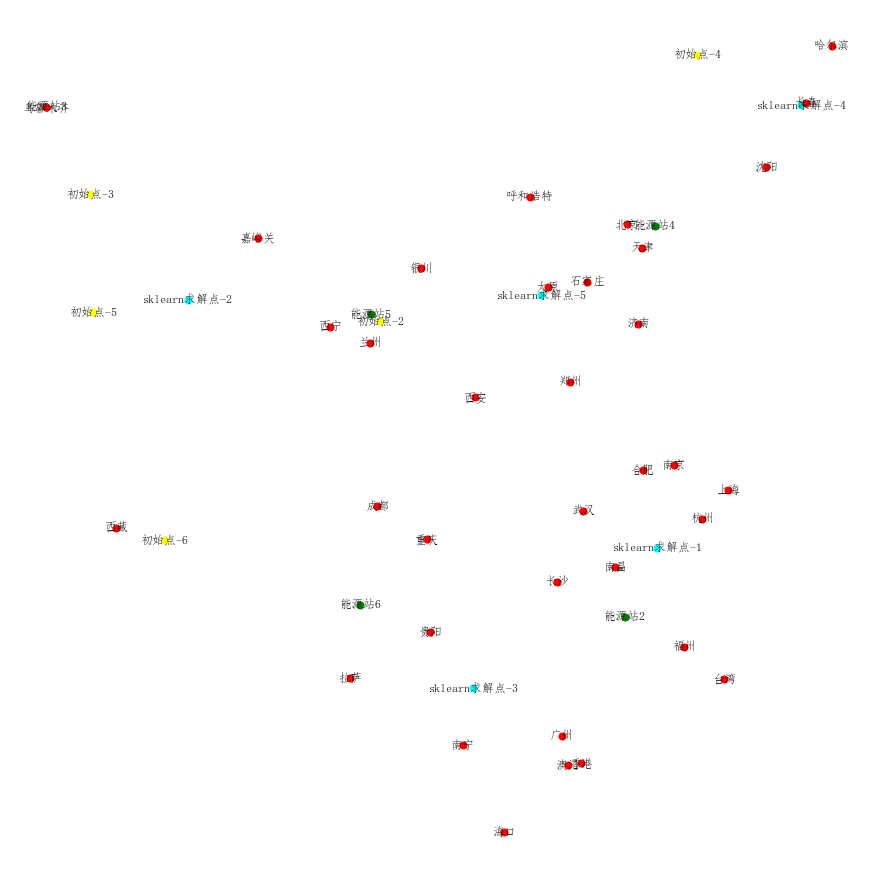

In [108]:
plt.figure(i,figsize= (12,12))
draw_cities({'初始点-{}'.format(int(i)+1):p for i, p in the_first_center.items()},color = 'yellow')
draw_cities({'sklearn求解点-{}'.format(int(i)+1):p for i, p in enumerate(kmeans.cluster_centers_)},color = 'cyan')  # 青色
draw_cities(city_location_with_station,color = 'green')  # 画出能源站  绿色
draw_cities(city_location,color = 'red')   # 画出所有城市